## NLP & MultiClass Classification: Airline Twitter sentiment data
https://www.crowdflower.com/data-for-everyone/

** Dataset Information: **

- 14640 Scraped Twitter data for major U.S. airlines including positive, negative, and neutral tweets

** Attribute Information:**

- _unit_id                      
- _golden                       
- _unit_state                    
- _trusted_judgments           
- _last_judgment_at            
- airline_sentiment              
- airline_sentiment:confidence    
- negativereason                  
- negativereason:confidence     
- airline                      
- airline_sentiment_gold          
- name                         
- negativereason_gold         
- retweet_count          
- text                       
- tweet_coord                     
- tweet_created                  
- tweet_id                        
- tweet_location                  
- user_timezone                   

** Objective of this project **

- predict sentiment (negative or not ) from tweets

## Data

In [1]:
options(warn=-1)
# Load Data
df_original <- read.csv('Airline-Sentiment-2-w-AA.csv', stringsAsFactors = FALSE)

In [2]:
# Inspect Data
head(df_original)

X_unit_id,X_golden,X_unit_state,X_trusted_judgments,X_last_judgment_at,airline_sentiment,airline_sentiment.confidence,negativereason,negativereason.confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
681448150,FALSE,finalized,3,2/25/15 5:24,neutral,1.0000,,NA,Virgin America,,cairdin,,0,@VirginAmerica What @dhepburn said.,,2/24/15 11:35,5.70306e+17,,Eastern Time (US & Canada)
681448153,FALSE,finalized,3,2/25/15 1:53,positive,0.3486,,0.0000,Virgin America,,jnardino,,0,@VirginAmerica plus you've added commercials to the experience... tacky.,,2/24/15 11:15,5.70301e+17,,Pacific Time (US & Canada)
681448156,FALSE,finalized,3,2/25/15 10:01,neutral,0.6837,,NA,Virgin America,,yvonnalynn,,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,,2/24/15 11:15,5.70301e+17,Lets Play,Central Time (US & Canada)
681448158,FALSE,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,,jnardino,,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",,2/24/15 11:15,5.70301e+17,,Pacific Time (US & Canada)
681448159,FALSE,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,,jnardino,,0,@VirginAmerica and it's a really big bad thing about it,,2/24/15 11:14,5.70301e+17,,Pacific Time (US & Canada)
681448162,FALSE,finalized,3,2/25/15 9:10,negative,1.0000,Can't Tell,0.6842,Virgin America,,jnardino,,0,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing. it's really the only bad thing about flying VA,,2/24/15 11:14,5.70301e+17,,Pacific Time (US & Canada)


In [3]:
str(df_original)

'data.frame':	14640 obs. of  20 variables:
 $ X_unit_id                   : int  681448150 681448153 681448156 681448158 681448159 681448162 681448165 681448167 681448169 681448171 ...
 $ X_golden                    : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ X_unit_state                : chr  "finalized" "finalized" "finalized" "finalized" ...
 $ X_trusted_judgments         : int  3 3 3 3 3 3 3 3 3 3 ...
 $ X_last_judgment_at          : chr  "2/25/15 5:24" "2/25/15 1:53" "2/25/15 10:01" "2/25/15 3:05" ...
 $ airline_sentiment           : chr  "neutral" "positive" "neutral" "negative" ...
 $ airline_sentiment.confidence: num  1 0.349 0.684 1 1 ...
 $ negativereason              : chr  "" "" "" "Bad Flight" ...
 $ negativereason.confidence   : num  NA 0 NA 0.703 1 ...
 $ airline                     : chr  "Virgin America" "Virgin America" "Virgin America" "Virgin America" ...
 $ airline_sentiment_gold      : chr  "" "" "" "" ...
 $ name                        : chr  "cairdin" "jn

In [4]:
summary(df_original)

   X_unit_id          X_golden       X_unit_state       X_trusted_judgments
 Min.   :681448150   Mode :logical   Length:14640       Min.   :  2.000    
 1st Qu.:681453596   FALSE:14600     Class :character   1st Qu.:  3.000    
 Median :681457818   TRUE :40        Mode  :character   Median :  3.000    
 Mean   :681495695                                      Mean   :  3.619    
 3rd Qu.:681462274                                      3rd Qu.:  3.000    
 Max.   :681679798                                      Max.   :248.000    
                                                                           
 X_last_judgment_at airline_sentiment  airline_sentiment.confidence
 Length:14640       Length:14640       Min.   :0.3350              
 Class :character   Class :character   1st Qu.:0.6923              
 Mode  :character   Mode  :character   Median :1.0000              
                                       Mean   :0.9002              
                                       3rd Qu.:1.000

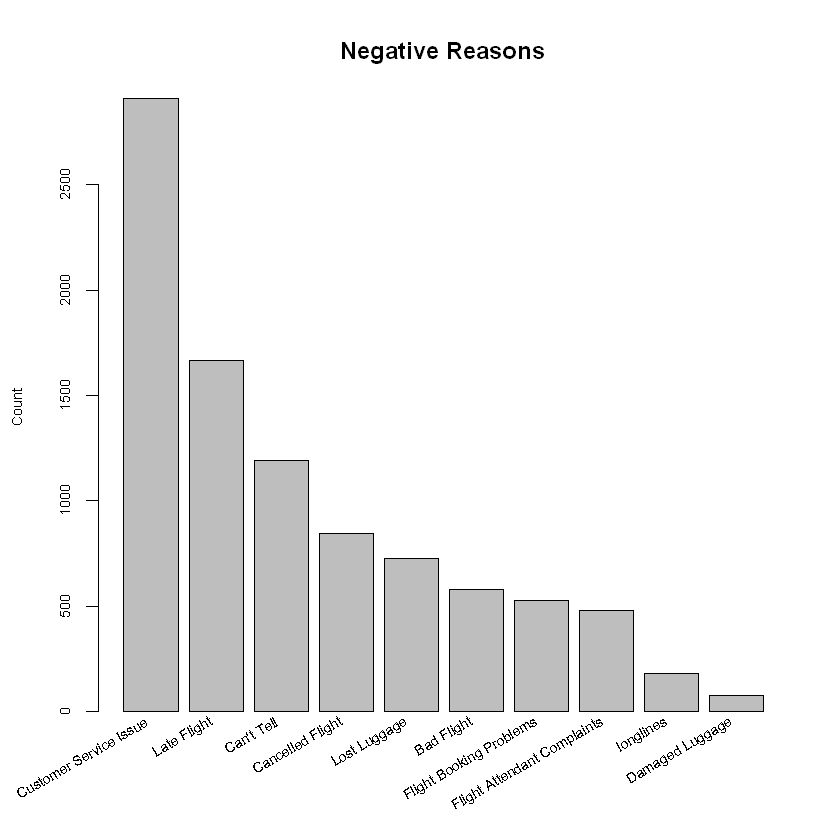

In [5]:
# negative reason
x <- barplot(sort(table(df_original$negativereason), decreasing = TRUE)[2:11], xaxt="n",
            main='Negative Reasons', ylab='Count', cex.names=0.7, cex.lab=0.7, cex.axis=0.7)
text(cex=0.7, x=x-0.1, y=-40, xpd=TRUE, srt=30, adj= 1,
     paste(names(sort(table(df_original$negativereason), decreasing = TRUE)[2:11])))

Loading required package: NLP


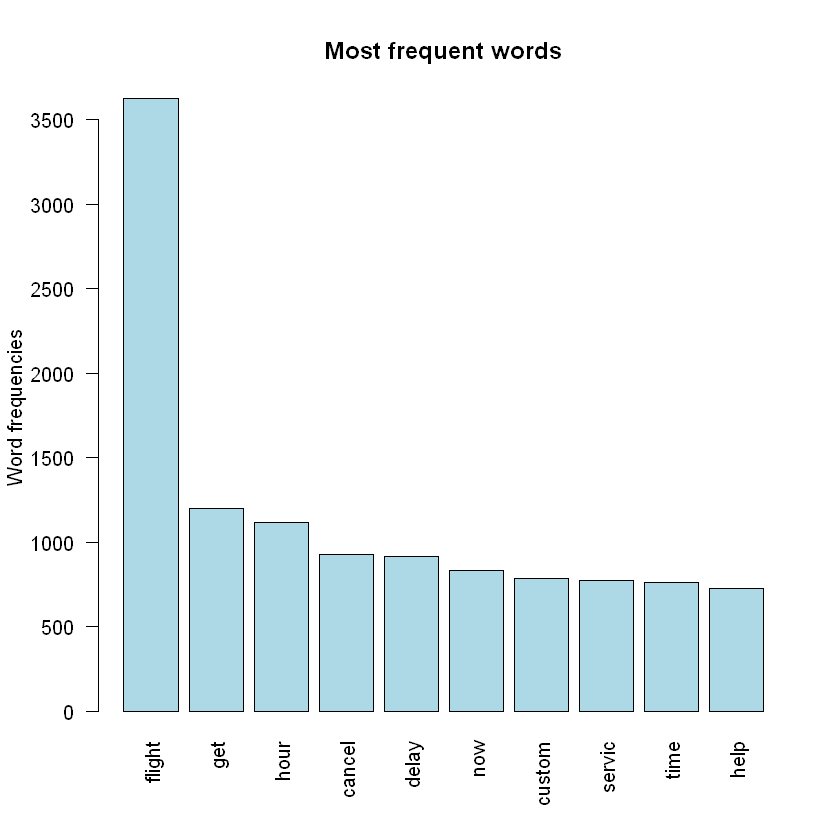

In [6]:
# text mining
library(tm)
library(SnowballC)

clean_tweet = gsub("&amp", " ", df_original[df_original$airline_sentiment=='negative',]$text)
clean_tweet = gsub("\\[link]", " ", clean_tweet)
clean_tweet = gsub("(f|ht)tp(s?)://\\S+", " ", clean_tweet)
clean_tweet = gsub("(RT|via)((?:\\b\\W*@\\w+)+)", " ", clean_tweet)
clean_tweet = gsub("@\\w+", " ", clean_tweet)
#clean_tweet = gsub("#\\w+", " ", clean_tweet)
clean_tweet = gsub("[^a-zA-Z]", " ", clean_tweet)

corpus = VCorpus(VectorSource(clean_tweet))
corpus = tm_map(corpus, content_transformer(tolower))
corpus = tm_map(corpus, removeWords, c(stopwords("english"),"can"))
corpus = tm_map(corpus, stemDocument)

dtm = TermDocumentMatrix(corpus)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)

# top 10 words in negative tweets
barplot(d[1:10,]$freq, las = 2, names.arg = d[1:10,]$word,
        col ="lightblue", main ="Most frequent words",
        ylab = "Word frequencies")

Loading required package: RColorBrewer


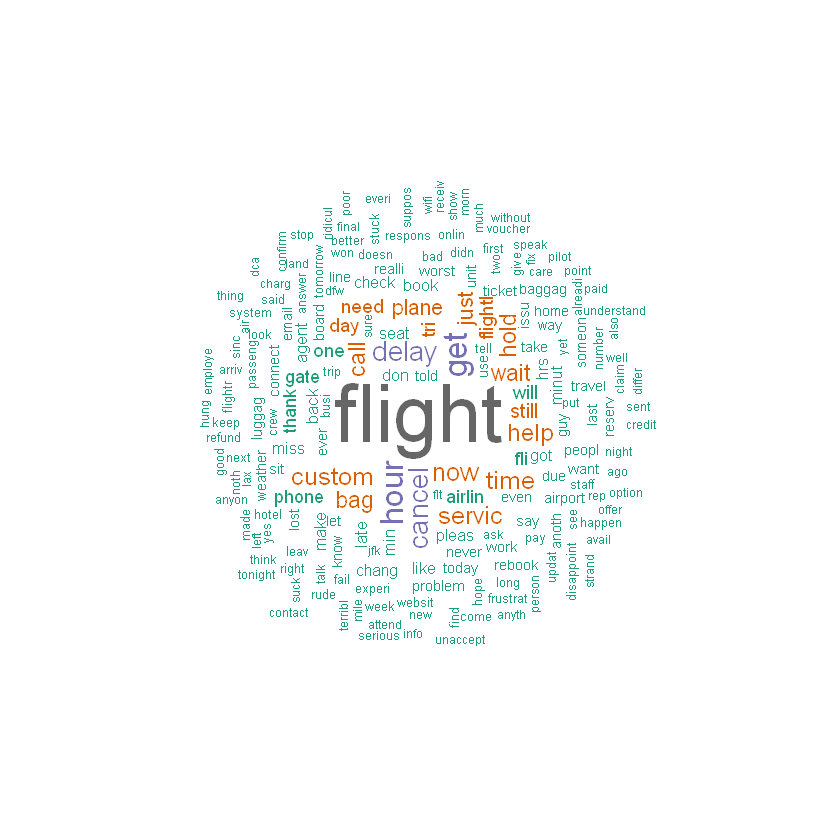

In [7]:
# wordcloud
library(wordcloud)
library(RColorBrewer)
wordcloud(words = d$word, freq = d$freq, scale=c(4,.5), min.freq = 2,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

## Data preprocessing

** Encode label **

In [8]:
# to binary label: negative or not
df_original$label <- df_original$airline_sentiment
df_original[df_original$label == 'negative',]$label <- 1
df_original[df_original$label != 1,]$label <- 0
df_original$label = factor(df_original$label, levels = c(0, 1))
table(df_original$label)


   0    1 
5462 9178 

** Clean Text **

In [9]:
clean_tweet = gsub("&amp", " ", df_original$text)
clean_tweet = gsub("\\[link]", " ", clean_tweet)
clean_tweet = gsub("(f|ht)tp(s?)://\\S+", " ", clean_tweet)
clean_tweet = gsub("(RT|via)((?:\\b\\W*@\\w+)+)", " ", clean_tweet)
clean_tweet = gsub("@\\w+", " ", clean_tweet)
#clean_tweet = gsub("#\\w+", " ", clean_tweet)
clean_tweet = gsub("[^a-zA-Z]", " ", clean_tweet)

corpus = VCorpus(VectorSource(clean_tweet))
corpus = tm_map(corpus, content_transformer(tolower))
corpus = tm_map(corpus, removeWords, c(stopwords("english"),"can"))
corpus = tm_map(corpus, stemDocument)
corpus = tm_map(corpus, stripWhitespace)

** Create Bag-Of-Words model **

In [11]:
dtm = DocumentTermMatrix(corpus)
dtm = removeSparseTerms(dtm, 0.999)
df = as.data.frame(as.matrix(dtm))
dim(df)
df$label = df_original$label
dim(df)
label_col = dim(df)[2]

[1] 14640  1105

[1] 14640  1106

** Split Train Test Sets **

In [16]:
library(caTools)
library(caret)
seed = 101 #random seed for reproducibility
set.seed(seed) 

split = sample.split(df$label, SplitRatio = 0.80)
train_set = subset(df, split == TRUE)
test_set = subset(df, split == FALSE)

Loading required package: lattice
Loading required package: ggplot2

Attaching package: 'ggplot2'

The following object is masked from 'package:NLP':

    annotate



## Model Train /  Evaluation

In [28]:
# Logistic Regression
model <- glm(label ~.,family=binomial(link='logit'), data=train_set)
predictions <- predict(model, newdata = test_set[-label_col])
predictions <- ifelse(predictions > 0.5,1,0)
confusionMatrix(predictions, test_set$label)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0  903  344
         1  189 1492
                                          
               Accuracy : 0.818           
                 95% CI : (0.8035, 0.8318)
    No Information Rate : 0.627           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6217          
 Mcnemar's Test P-Value : 2.55e-11        
                                          
            Sensitivity : 0.8269          
            Specificity : 0.8126          
         Pos Pred Value : 0.7241          
         Neg Pred Value : 0.8876          
             Prevalence : 0.3730          
         Detection Rate : 0.3084          
   Detection Prevalence : 0.4259          
      Balanced Accuracy : 0.8198          
                                          
       'Positive' Class : 0               
                                          